## Exercise 2: One hidden layer, different optizimizers
### Description

Train a network with one hidden layer and compare different optimizers.

1. Use one hidden layer with 64 units and the 'relu' activation. Use the [summary method](https://keras.io/models/about-keras-models/) to inspect your model.
2. Fit the model for 50 epochs with different learning rates of stochastic gradient descent and answer the question below.
3. Replace the stochastic gradient descent optimizer with the [Adam optimizer](https://keras.io/optimizers/#adam).
4. Plot the learning curves of SGD with a reasonable learning rate together with the learning curves of Adam in the same figure. Take care of a reasonable labeling of the curves in the plot.

### Solution

### 1. One hidden layer with 64 units

In [288]:
model2 = Sequential([Dense(units=64, input_dim=256, activation= 'relu'), Dense(5,activation= 'softmax')])
model2.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_518 (Dense)            (None, 64)                16448     
_________________________________________________________________
dense_519 (Dense)            (None, 5)                 325       
Total params: 16,773
Trainable params: 16,773
Non-trainable params: 0
_________________________________________________________________


### 2. Fit the model for 50 epochs with different learning rates of stochastic gradient descent

In [289]:
# define 4 SGD optimizers, each with a different learning rate
sgds = [SGD(lr=rate, decay=1e-6, momentum=0.9, nesterov=True) for rate in [0.001, 0.01, 0.1, 0.3, 1]]

In [300]:
# Run SGD for the learning rates 0.001, 0.01, 0.1, 0.3, 1
history = []
accuracy = []

for sgd in sgds:
    print('Lambda = {}'.format(str(sgd.lr)))
    m = Sequential([Dense(units=64, input_dim=256, activation= 'relu'), Dense(5,activation= 'softmax')])
    m.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    hist = m.fit(x_train, y_train, validation_data= (x_test, y_test), batch_size=128, epochs=50, verbose=0)
    acc = m.evaluate(x_test, y_test, verbose=0)
    history.append(hist)
    accuracy.append(acc)

Lambda = <tf.Variable 'SGD_4/lr:0' shape=() dtype=float32_ref>
Lambda = <tf.Variable 'SGD_5/lr:0' shape=() dtype=float32_ref>
Lambda = <tf.Variable 'SGD_6/lr:0' shape=() dtype=float32_ref>
Lambda = <tf.Variable 'SGD_7/lr:0' shape=() dtype=float32_ref>
Lambda = <tf.Variable 'SGD_8/lr:0' shape=() dtype=float32_ref>


**Question**: What happens if the learning rate of SGD is A) very large B) very small? Please answer A) and B) with one full sentence (double click this markdown cell to edit).

**Answer**:

A) **The alogrithm doesn't converge (lr = 1): the accuracy fluctuates at a very low level (around 35%), and the validation error grows.**

B) **The convergence is slow (lr = 0.001).**

### 3. Adam optimizer

In [303]:
adam = Sequential([Dense(units=64, input_dim=256, activation= 'relu'), Dense(5,activation= 'softmax')])
adam.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist_adam = adam.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=50, verbose=0)
acc_adam = adam.evaluate(x_test, y_test, verbose=0)

### 4. Plot of the learning curves

**Accuracies:**

In [304]:
for i in range(len(accuracy)):
    lr = round(sgds[i].get_config()['lr'], 3)
    print("SGD optimizer using lr = {}, Accuracy= {}%".format(lr, round(accuracy[i][1]*100, 4)))
print("Adam optimizer, Accuracy= {}%".format(round(acc_adam[1]*100, 4)))

SGD optimizer using lr = 0.001, Accuracy= 72.5614%
SGD optimizer using lr = 0.01, Accuracy= 85.5766%
SGD optimizer using lr = 0.1, Accuracy= 86.602%
SGD optimizer using lr = 0.3, Accuracy= 80.7232%
SGD optimizer using lr = 1.0, Accuracy= 34.8554%
Adam optimizer, Accuracy= 87.5795%


**Curves:**

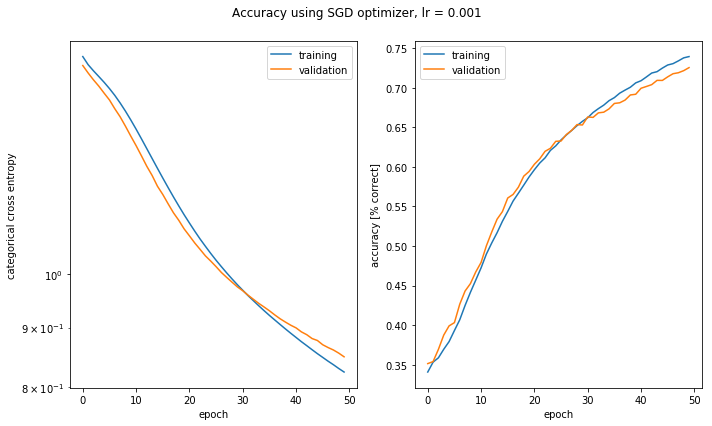

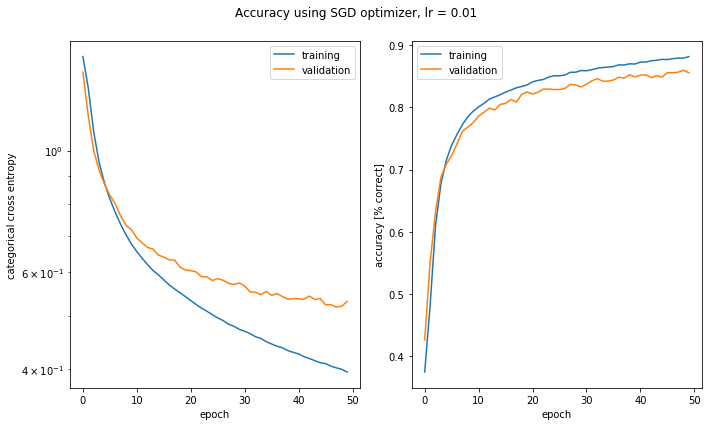

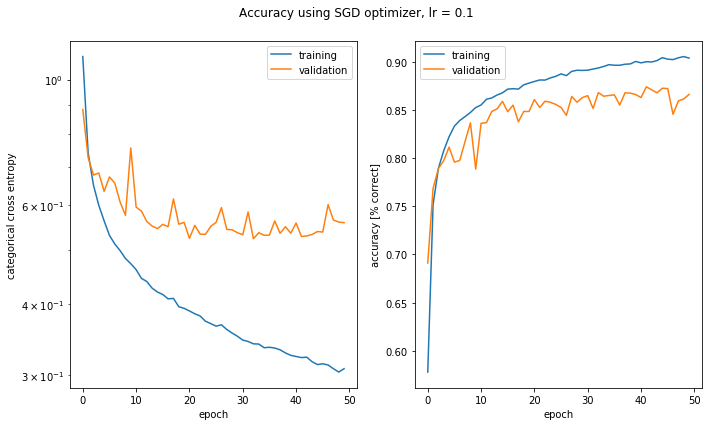

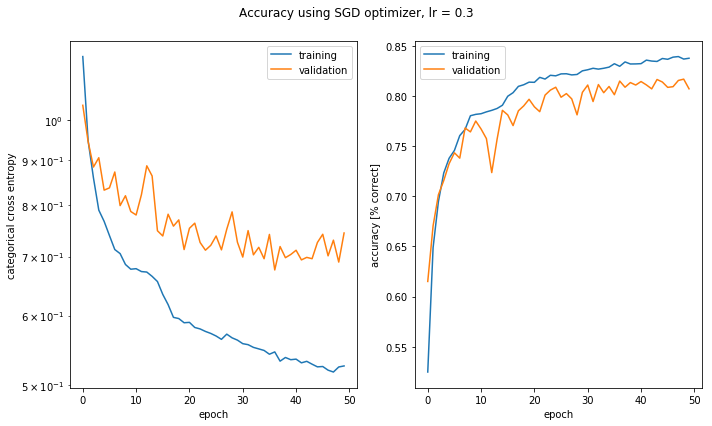

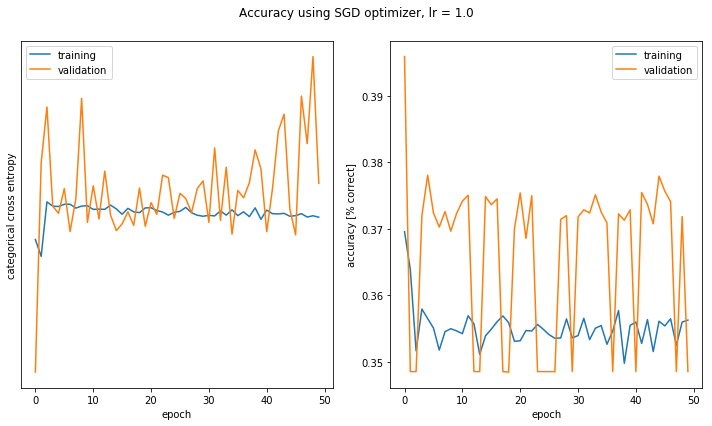

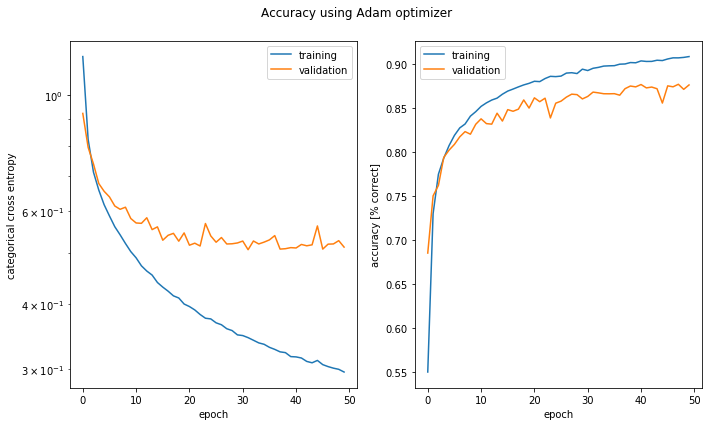

In [305]:
for i in range(len(history)):
    lr = round(sgds[i].get_config()['lr'], 3)
    plot_history(history[i], 'Accuracy using SGD optimizer, lr = {}'.format(lr))
plot_history(hist_adam, 'Accuracy using Adam optimizer')